# <center>Capstone Project - Cyber Security

<html>
<body>
<h3>Problem Statement:</h3>
<pre>Book-My-Show will enable the ads on their website, but they are also very cautious about their user privacy and information who visit their website. Some ads URL could contain a malicious link that can trick any recipient and lead to a malware installation, freezing the system as part of a ransomware attack or revealing sensitive information. Book-My-Show now wants to analyze that whether the particular URL is prone to phishing (malicious) or not.

Dataset Details: 

The input dataset contains an 11k sample corresponding to the 11k URL. Each sample contains 32 features that give a different and unique description of URL ranging from -1,0,1.

 1: Phishing

 0: Suspicious

 1: Legitimate

The sample could be either legitimate or phishing.
</pre>
</body>
</html>


In [2]:
#Import Package
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.display.max_columns = None
#pd.options.display.max_rows = None

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier,cv
from sklearn.metrics import roc_curve, auc

from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.model_selection import GridSearchCV, StratifiedKFold

import warnings
warnings.filterwarnings('ignore')


In [3]:
df_cybersec_data = pd.read_csv('dataset.csv')

<html>
<body>
<h3>Project Task: Week 1</h3><br>
<b>Exploratory Data Analysis:</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;<li> Each sample has 32 features ranging from -1,0,1. Explore the data using histogram, heatmaps. 
&nbsp;&nbsp;&nbsp;&nbsp;<li> Determine the number of samples present in the data, unique elements in all the features. 
&nbsp;&nbsp;&nbsp;&nbsp;<li> Check if there is any null value in any features. 
     
</body>
</html>

In [4]:
#Deleting "index" column from dataframe
df_cybersec_data = df_cybersec_data.drop('index',1)

In [5]:
print('Shape of the Dataframe', df_cybersec_data.shape)

Shape of the Dataframe (11055, 31)


In [6]:
print(df_cybersec_data.head())

   having_IPhaving_IP_Address  URLURL_Length  Shortining_Service  \
0                          -1              1                   1   
1                           1              1                   1   
2                           1              0                   1   
3                           1              0                   1   
4                           1              0                  -1   

   having_At_Symbol  double_slash_redirecting  Prefix_Suffix  \
0                 1                        -1             -1   
1                 1                         1             -1   
2                 1                         1             -1   
3                 1                         1             -1   
4                 1                         1             -1   

   having_Sub_Domain  SSLfinal_State  Domain_registeration_length  Favicon  \
0                 -1              -1                           -1        1   
1                  0               1              

In [7]:
df_cybersec_data.describe()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,0.728268,0.675079,0.186793,-0.076526,-0.118137,-0.595749,0.635640,0.705292,0.115694,0.762099,0.913885,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,0.685324,0.737779,0.982444,0.715138,0.763973,0.759143,0.772021,0.708949,0.319872,0.647490,0.405991,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#List Features and Data Types of Train
dtype_df = df_cybersec_data.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,31


###### Observation: Only Integer values are found in dataset

In [9]:
#Missing Values 
missing_df = df_cybersec_data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count


###### Observation: No missing values in the dataset

In [10]:
#Number of Unique values
df_cybersec_data.nunique()  

having_IPhaving_IP_Address     2
URLURL_Length                  3
Shortining_Service             2
having_At_Symbol               2
double_slash_redirecting       2
Prefix_Suffix                  2
having_Sub_Domain              3
SSLfinal_State                 3
Domain_registeration_length    2
Favicon                        2
port                           2
HTTPS_token                    2
Request_URL                    2
URL_of_Anchor                  3
Links_in_tags                  3
SFH                            3
Submitting_to_email            2
Abnormal_URL                   2
Redirect                       2
on_mouseover                   2
RightClick                     2
popUpWidnow                    2
Iframe                         2
age_of_domain                  2
DNSRecord                      2
web_traffic                    3
Page_Rank                      2
Google_Index                   2
Links_pointing_to_page         3
Statistical_report             2
Result    

In [11]:
#check for NULL value in the dataset
df_cybersec_data.isnull().sum().sum()

0

In [12]:
# NULL value check
df_cybersec_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   11055 non-null  int64
 1   URLURL_Length                11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [13]:
# Duplicate check
df_transpose = df_cybersec_data.T
print(df_transpose.duplicated().sum())

0


###### Observation: No duplicate column values

## Plot histogram and heat map for data exploration

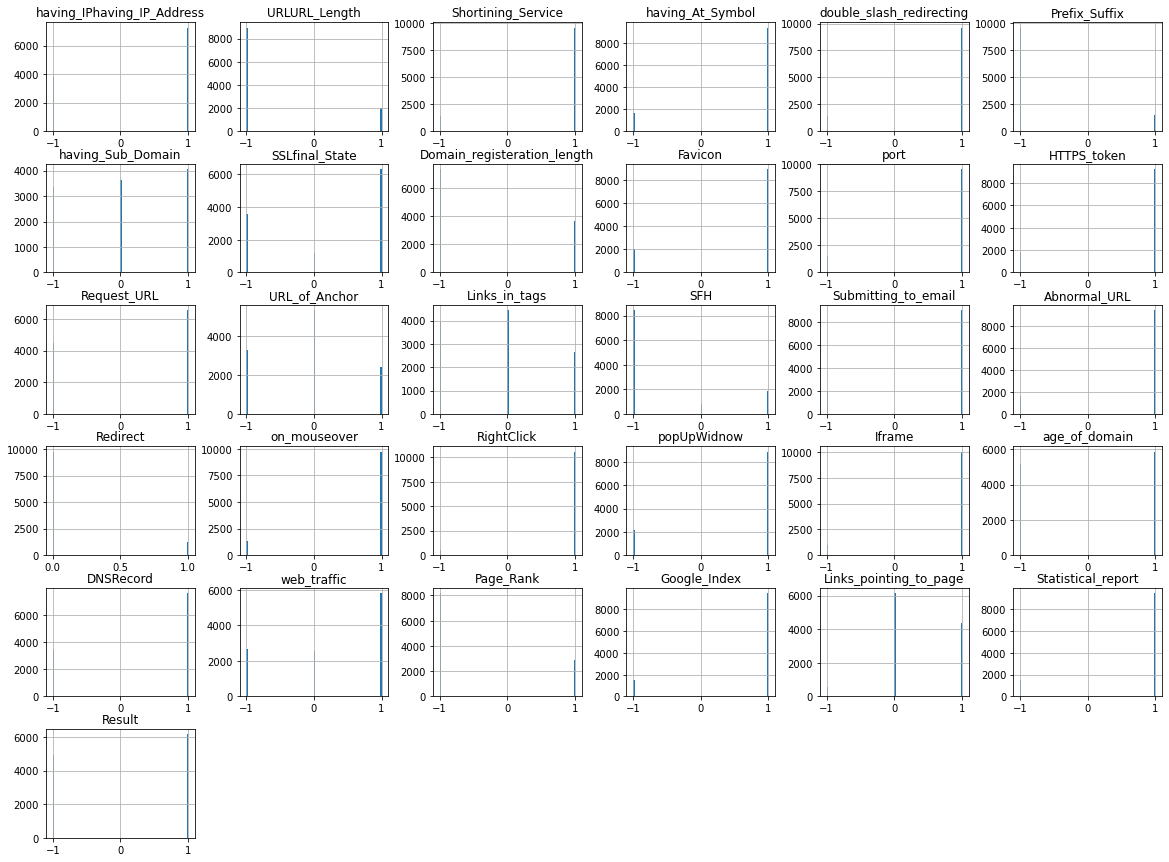

In [14]:
df_cybersec_data.hist(bins=100, figsize=(20,15))
plt.show()

<AxesSubplot:>

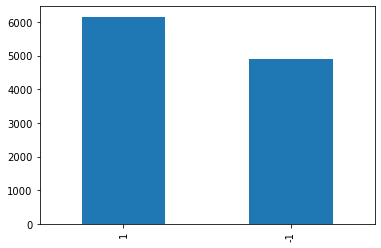

In [15]:
pd.value_counts(df_cybersec_data['Result']).plot.bar()

<html>
<body>

<h4>Correlation of features and feature selection:</h4>
&nbsp;&nbsp;<li> Next, we have to find if there are any correlated features present in the data. Remove the feature which might be correlated with some threshold.

</body>
</html>

<AxesSubplot:>

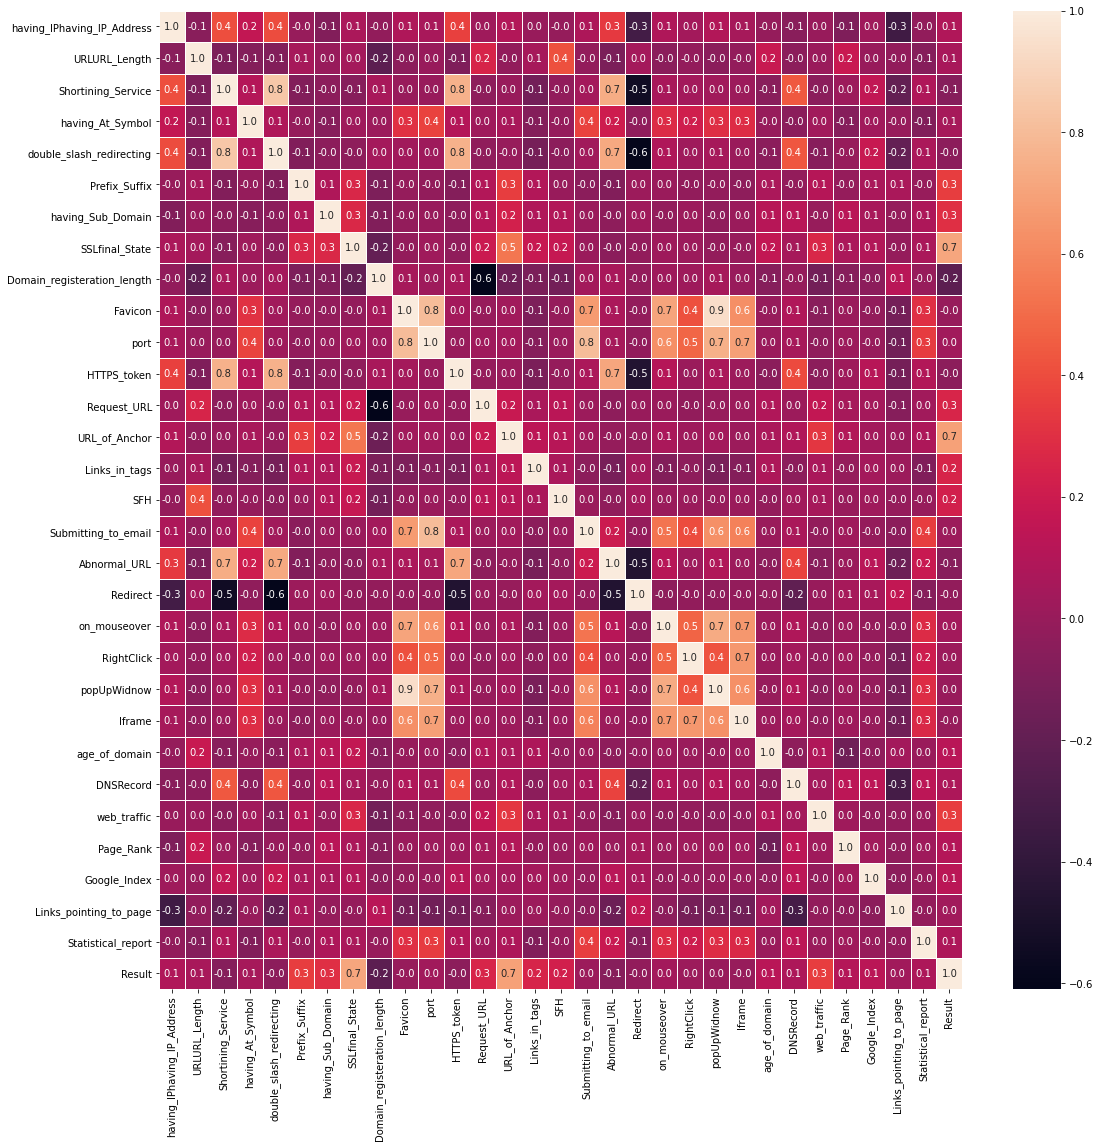

In [16]:
#correlation map
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df_cybersec_data.corr(),annot=True, linewidths=.5, fmt='.1f',ax=ax)

In [17]:
cor_matrix = df_cybersec_data.corr().abs()
upper_tri=cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [40]:
# threshold greater than 0.75
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
print(to_drop)

['double_slash_redirecting', 'port', 'HTTPS_token', 'Submitting_to_email', 'popUpWidnow']


In [19]:
#drop the columns which are highly correlated 
df_cybersec_data.drop(to_drop,axis=1,inplace=True)

In [20]:
df_cybersec_data.shape

(11055, 26)

### Train Test Split 

In [21]:
# split train - test to 70-30
train_X,test_X,train_Y,test_Y = train_test_split(df_cybersec_data.drop(columns='Result'),pd.DataFrame(df_cybersec_data['Result']),test_size=0.3, random_state=5)

In [22]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(7738, 25)
(7738, 1)
(3317, 25)
(3317, 1)


<h3>Project Task: Week 2</h3>

### Building Classification Model:
 
#### 1. Build classification models using a binary classifier to detect malicious or phishing URLs.
#### 2. Illustrate the diagnostic ability of this binary classifier by plotting the ROC curve.

In [23]:
#model build for different binary classification and show confusion matrix

def build_model(model_name,train_X, train_Y, test_X, test_Y):
    if model_name == 'LogisticRegression':
        model=LogisticRegression()
    elif model_name =='KNeighborsClassifier':
        model = KNeighborsClassifier(n_neighbors=4)
    elif model_name == 'XGBClassifier':
        model = XGBClassifier(objective='binary:logistic',eval_metric='auc') #,random_state=11
    elif model_name == 'RandomForest':
        model = RandomForestClassifier()
    else:
        print('not a valid model name')
    
    model=model.fit(train_X,train_Y)
    
    #Prediction probability for ROC
    pred_prob=model.predict_proba(test_X)
    fpr, tpr, thresh = roc_curve(test_Y, pred_prob[:,1], pos_label=1)
    
    #Accuracy
    model_predict= model.predict(test_X)
    acc=accuracy_score(model_predict,test_Y)
    print("Validation Accuracy: ",acc)
    
    # Classification report 
    print("Classification Report: ")
    print(classification_report(model_predict,test_Y))

    # Confusion Matrix 
    #print("Confusion Matrix for", model_name)
    con =  confusion_matrix(model_predict,test_Y)
    sns.heatmap(con,annot=True, fmt ='.2f')
    plt.suptitle('Confusion Matrix for '+model_name, x=0.44, y=1.0, ha='center', fontsize=25)
    plt.xlabel('Predict Values', fontsize =25)
    plt.ylabel('Test Values', fontsize =25)
    plt.show()
    return model, acc, fpr, tpr, thresh
    
        

## LogisticRegression Model

Validation Accuracy:  0.9210129635212542
Classification Report: 
              precision    recall  f1-score   support

          -1       0.90      0.91      0.91      1409
           1       0.93      0.93      0.93      1908

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317



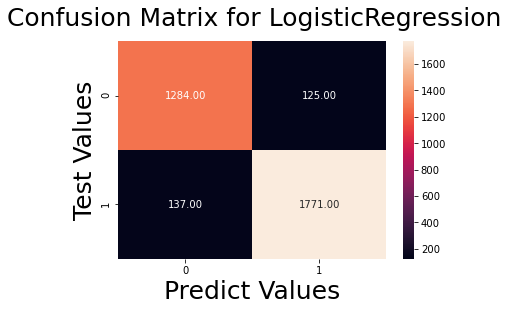

In [24]:
#Model 1 - LogisticRegression
lg_model,acc1, fpr1, tpr1, thresh1 = build_model('LogisticRegression',train_X, train_Y, test_X, test_Y.values.ravel())


## KNeighborsClassifier Model

Validation Accuracy:  0.9273439855290926
Classification Report: 
              precision    recall  f1-score   support

          -1       0.94      0.90      0.92      1490
           1       0.92      0.95      0.94      1827

    accuracy                           0.93      3317
   macro avg       0.93      0.92      0.93      3317
weighted avg       0.93      0.93      0.93      3317



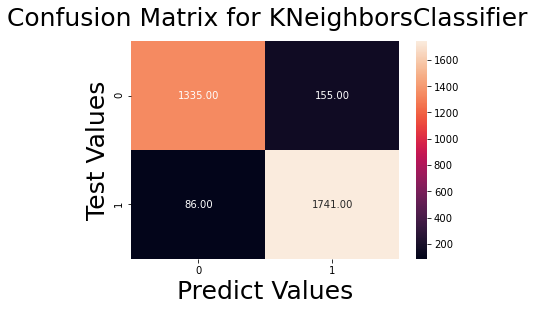

In [25]:
# Model 2 - KNeighborsClassifier
knn_model,acc2, fpr2, tpr2, thresh2 = build_model('KNeighborsClassifier',train_X, train_Y, test_X, test_Y.values.ravel())

## XGBClassifer Model

Validation Accuracy:  0.970756707868556
Classification Report: 
              precision    recall  f1-score   support

          -1       0.96      0.97      0.97      1404
           1       0.98      0.97      0.97      1913

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



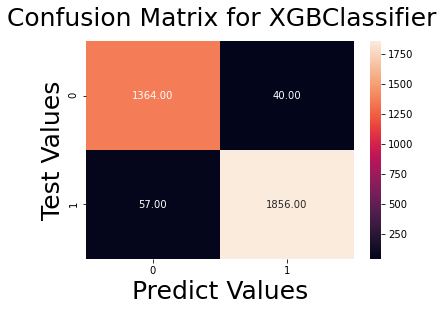

In [26]:
# Model 3 - XGBClassifier
xgb_model, acc3, fpr3, tpr3, thresh3 = build_model('XGBClassifier',train_X, train_Y, test_X, test_Y.values.ravel())

## Random Forest Model

Validation Accuracy:  0.9704552306300874
Classification Report: 
              precision    recall  f1-score   support

          -1       0.96      0.97      0.97      1393
           1       0.98      0.97      0.97      1924

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



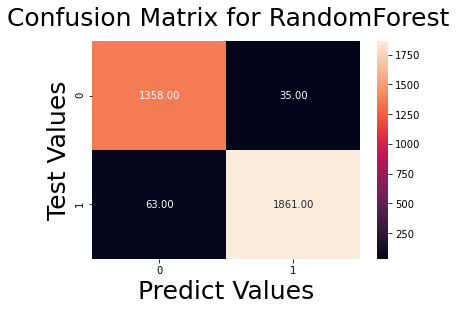

In [27]:
# Model 4 - RandomForest
rf_model, acc4, fpr4, tpr4, thresh4 = build_model('RandomForest',train_X, train_Y, test_X, test_Y.values.ravel())

### Plot ROC curve

In [28]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(test_Y))]
p_fpr, p_tpr, _ = roc_curve(test_Y, random_probs, pos_label=1)

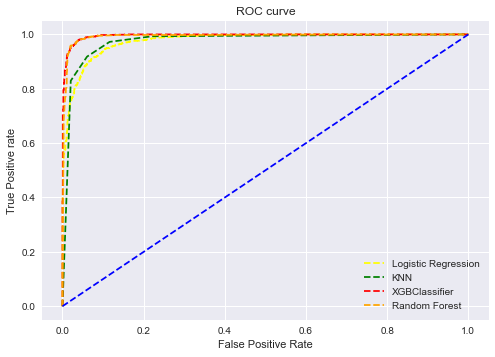

In [29]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='yellow', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='XGBClassifier')
plt.plot(fpr4, tpr4, linestyle='--',color='orange', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

### ROC plot shows XGBClassifier and Random Forest True Positive rate is higher than the other models.

### 3. Validate the accuracy of data by the K-Fold cross-validation technique.

### using GridSearchCV with StratifiedKFold cross-validation technique to validate the accuracy of data and find best parameter of different binary classifier models.

In [30]:
def Validate_Accuracy_GridSearchCV(model_name,X,y,nsplit):
    if model_name == 'LogisticRegression':
        model=LogisticRegression()
        param_grid = {
            'solver':['liblinear','newton-cg'],
            'C': [0.01,0.1,1,10,100],
            'penalty': ["l1","l2"]
            }
    elif model_name =='KNeighborsClassifier':
        model = KNeighborsClassifier()
        param_grid = {
            'n_neighbors':[3,4,11,19],
            'weights':['uniform','distance'],
            'metric':['euclidean','manhattan']
            }
    elif model_name == 'XGBClassifier':
        model = XGBClassifier(objective='binary:logistic',eval_metric='auc')
        param_grid = {
            'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'max_depth': [3, 4, 5]
            }
    elif model_name == 'RandomForest':
        model = RandomForestClassifier()
        param_grid = {
            "max_depth": [10, 20, 30,40,50,None],
            "max_features": ["auto", "sqrt"],
            # "min_samples_leaf": [1, 2, 4],
            # "min_samples_split": [2, 5, 10],
            "n_estimators": [200,400,500,800,1000]
            }
    else:
        print('not a valid model name')    
    
    sfolder = StratifiedKFold(n_splits=nsplit,random_state=0,shuffle=True)
    grid_search = GridSearchCV(estimator = model , param_grid = param_grid,
                               cv = sfolder.split(X,y), n_jobs = -1, verbose = 3, scoring = 'accuracy')
    
    gs_results = grid_search.fit(X,y)
    print('Accuracy Score :', gs_results.best_score_)
    print('Best Hyperparameters:', grid_search.best_params_)
    print('Model object with best parameters:')
    print(grid_search.best_estimator_)
    

## LogisticRegression Model

In [31]:
Validate_Accuracy_GridSearchCV('LogisticRegression',df_cybersec_data.drop(columns='Result'),pd.DataFrame(df_cybersec_data['Result']),5)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Accuracy Score : 0.9280868385345997
Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Model object with best parameters:
LogisticRegression(C=0.1, solver='newton-cg')


## KNeighborsClassifier Model evaluation using GridSearchCV

In [32]:
Validate_Accuracy_GridSearchCV('KNeighborsClassifier',df_cybersec_data.drop(columns='Result'),pd.DataFrame(df_cybersec_data['Result']),5)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Accuracy Score : 0.965716870194482
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}
Model object with best parameters:
KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')


## XGBClassifier with kfold cross validation

In [33]:
Validate_Accuracy_GridSearchCV('XGBClassifier',df_cybersec_data.drop(columns='Result'),pd.DataFrame(df_cybersec_data['Result']),5)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Accuracy Score : 0.9665309814563546
Best Hyperparameters: {'colsample_bytree': 0.6, 'gamma': 1, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 1.0}
Model object with best parameters:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, eval_metric='auc',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1.0, tree_method='exact',
              validate_parameters=1, verbosity=None)


## Random Forest with kfold cross validation

In [34]:
Validate_Accuracy_GridSearchCV('RandomForest',df_cybersec_data.drop(columns='Result'),pd.DataFrame(df_cybersec_data['Result']),5)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Accuracy Score : 0.9709633649932158
Best Hyperparameters: {'max_depth': 30, 'max_features': 'auto', 'n_estimators': 400}
Model object with best parameters:
RandomForestClassifier(max_depth=30, n_estimators=400)


## 4. The final output consists of the model, which will give maximum accuracy on the validation dataset with selected attributes.

In [35]:
results=pd.DataFrame({'Model':['LogisticRegression','KNN','XGBoost','RandomForest'],
                     'Accuracy Score':[acc1,acc2,acc3,acc4]})
result_df=results.sort_values(by='Accuracy Score', ascending=False)
result_df=result_df.set_index('Model')
result_df

,Accuracy Score
Model,
XGBoost,0.970757
RandomForest,0.970455
KNN,0.927344
LogisticRegression,0.921013


# Based on Cross validation, Confusion matix and Accuracy score XGBClassifier model shows it is the best model for the given usecase which has maximum accurancy, hence saving this model

In [36]:
import pickle
pickle.dump(xgb_model,open('xgboost_model', 'wb'))

<center> -------------------------------